# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [1]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline


# **Base de dados** 

In [2]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# ***Especificação***
#### 1. **Coletar	dados ok**
#### 2.	**Realizar pré-processamento	dos	dados**	


*   Definição	de	tipos - ok
*   Tratamento	de	dados	ausentes - ok
*   Normalização	e	discretização 
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
#### 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações** 
#### 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças**


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Pré-processamento** 

### Visualização dos dados

In [3]:
# Dicionário do dataframe
df_dictionary

,FIELD,DESCRIPTION,REFERENCE,UNIT,SOURCE,Unnamed: 5
0,CITY,Name of the City,NaN,NaN,-,NaN
1,STATE,Name of the State,NaN,NaN,-,NaN
2,CAPITAL,1 if Capital of State,NaN,NaN,-,NaN
3,IBGE_RES_POP,Resident Population,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
4,IBGE_RES_POP_BRAS,Resident Population Brazilian,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
5,IBGE_RES_POP_ESTR,Redident Population Foreigners,2010,-,https://sidra.ibge.gov.br/tabela/1497,NaN
6,IBGE_DU,Domestic Units Total,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
7,IBGE_DU_URBAN,Domestic Units Urban,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
8,IBGE_DU_RURAL,Domestic Units Rural,2010,-,https://sidra.ibge.gov.br/tabela/3495,NaN
9,IBGE_POP,Resident Population Regular Urban Planning,2010,-,https://sidra.ibge.gov.br/tabela/3365,NaN


In [4]:
df_brazil.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,69,318,438,517,3542,416,319,1843,1689,0.708,0.687,0.830,0.622,-49.4405,-16.7588,893.6015,360,842,147.256,0,0,8583,Urbano,6201,27991,74750,36915,145858,20554,166412,8053,20665.0,Demais serviços,28227690,284,5,1,56,0,2,29,110,26,4,5,0,2,10,12,4,6,6,1,5,0,0,0,0,0,0,0,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,38,207,260,351,2709,589,4479,18017,2207,0.689,0.693,0.839,0.563,-47.3968,-18.4876,753.1249,77,296,881.064,Caminhos Do Cerrado,D,6972,Rural Adjacente,50525,25918,62689,28084,167215,12873,180089,7037,25592.0,Demais serviços,17909274,476,6,6,30,1,2,34,190,70,28,11,0,4,15,29,2,9,14,6,19,0,0,0,0,0,0,0,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,139,650,894,1087,6896,990,10307,33085,2202,0.689,0.671,0.841,0.579,-48.7188,-16.1827,1017.5506,227,720,1045.127,Região Turística Do Ouro E Cristais,C,19614,Rural Adjacente,42839,16728,138199,63396,261162,26823,287984,18427,15628.0,Demais serviços,37513019,288,5,9,26,0,2,7,117,12,57,2,1,0,7,15,3,11,5,1,8,0,0,1,34,1,1,1,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,1354,5567,7618,8905,53516,5996,25200,700872,3530,0.628,0.579,0.798,0.537,-48.8844,-1.7235,10.1203,3389,1218,1610.651,Araguaia-Tocantins,D,156292,Urbano,140464,58610,468129,486872,1154075,95180,1249255,151934,8222.0,"Administração, defesa, educação e saúde públic...",0,931,4,2,43,0,1,27,500,16,31,6,1,1,22,16,2,155,33,15,56,0,0,0,0,2,4,2,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,176,856,1233,1539,11979,2681,1862,7502,1994,0.698,0.720,0.848,0.556,-45.4462,-19.1558,644.7399,1230,1716,1817.067,Lago De Três Marias,D,23223,Urbano,113825,31003,172333,86081,403241,26994,430235,23574,18250.0,Demais serviços,0,621,18,1,40,0,1,20,303,62,30,9,6,4,28,27,2,15,19,9,27,0,0,0,0,2,2,2,2,44974716,371922572,6928,2953,0,0,0,0,4


In [5]:
df_brazil[['CITY','STATE','REGIAO_TUR','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].head(10)

,CITY,STATE,REGIAO_TUR,CATEGORIA_TUR,GVA_MAIN,RURAL_URBAN
0,Abadia De Goiás,GO,0,0,Demais serviços,Urbano
1,Abadia Dos Dourados,MG,Caminhos Do Cerrado,D,Demais serviços,Rural Adjacente
2,Abadiânia,GO,Região Turística Do Ouro E Cristais,C,Demais serviços,Rural Adjacente
3,Abaetetuba,PA,Araguaia-Tocantins,D,"Administração, defesa, educação e saúde públic...",Urbano
4,Abaeté,MG,Lago De Três Marias,D,Demais serviços,Urbano
5,Abaiara,CE,0,0,"Administração, defesa, educação e saúde públic...",Rural Adjacente
6,Abaré,BA,0,0,"Administração, defesa, educação e saúde públic...",Rural Remoto
7,Abatiá,PR,0,0,"Agricultura, inclusive apoio à agricultura e a...",Rural Adjacente
8,Abaíra,BA,Chapada Diamantina,D,"Administração, defesa, educação e saúde públic...",Rural Remoto
9,Abdon Batista,SC,Vale Do Contestado,D,"Administração, defesa, educação e saúde públic...",Rural Adjacente


In [6]:
 #Verificando se existe dados nulos
print(df_brazil.isnull().sum())

CITY                      0
STATE                     0
CAPITAL                   0
IBGE_RES_POP              0
IBGE_RES_POP_BRAS         0
IBGE_RES_POP_ESTR         0
IBGE_DU                   0
IBGE_DU_URBAN             0
IBGE_DU_RURAL             0
IBGE_POP                  0
IBGE_1                    0
IBGE_1-4                  0
IBGE_5-9                  0
IBGE_10-14                0
IBGE_15-59                0
IBGE_60+                  0
IBGE_PLANTED_AREA         0
IBGE_CROP_PRODUCTION_$    0
IDHM Ranking 2010         0
IDHM                      0
IDHM_Renda                0
IDHM_Longevidade          0
IDHM_Educacao             0
LONG                      0
LAT                       0
ALT                       0
PAY_TV                    0
FIXED_PHONES              0
AREA                      0
REGIAO_TUR                0
CATEGORIA_TUR             0
ESTIMATED_POP             0
RURAL_URBAN               0
GVA_AGROPEC               0
GVA_INDUSTRY              0
GVA_SERVICES        

In [7]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

### Limpeza de dados

###### Verificando se existe dados duplicados

In [8]:
len(df_brazil)


5578

In [9]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [10]:
len(df_brazil)

5576

In [11]:
df_brazil[df_brazil['CITY'] == 'Paraty'][['CITY','STATE','LAT','LONG']]

,CITY,STATE,LAT,LONG
3561,Paraty,RJ,-23.2194,-44.7109
3562,Paraty,RJ,-23.2194,-44.7109


In [12]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [13]:
len(df_brazil)

5575

###### Limpeza de dados discrepantes

In [14]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)][['CITY', 'STATE', 'AREA', 'IDHM']]


,CITY,STATE,AREA,IDHM
4448,Santa Teresinha,BA,0.0,0.587
4746,São Caetano,PE,0.0,0.000
5070,São Vicente do Seridó,PB,0.0,0.555


In [15]:
#Limpando as cidades que tem área 0
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] < 3.565)].index, inplace=True)

In [16]:
len(df_brazil)

5572

In [17]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)][['CITY', 'STATE', 'AREA', 'IBGE_RES_POP']]

,CITY,STATE,AREA,IBGE_RES_POP
436,Balneário Rincão,SC,63.431,0
2666,Lagoa Dos Patos,RS,10158.754,0
2673,Lagoa Mirim,RS,2859.139,0
3079,Mojuí Dos Campos,PA,4988.236,0
3569,Paraíso Das Águas,MS,5061.433,0
3722,Pescaria Brava,SC,106.853,0
3781,Pinto Bandeira,RS,104.856,0


In [18]:
#Eliminando as cidades que tem menos de 776 habitantes
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP'] < 776)].index, inplace=True)

In [19]:
len(df_brazil)

5565

In [20]:
#Verificando as cidades que tem IDHM menor que 0.0
df_brazil.loc[(df_brazil['IDHM'] == 0.0)][['CITY','STATE','IDHM','IDHM_Renda','IDHM_Longevidade','IDHM_Educacao']]

,CITY,STATE,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
4456,Santa Terezinha,BA,0.0,0.0,0.0,0.0
5066,São Vicente Do Seridó,PB,0.0,0.0,0.0,0.0


In [21]:
#Eliminando as cidades que tem IDHM menor que 0.0
df_brazil.drop(df_brazil.loc[(df_brazil['IDHM'] == 0.0)].index, inplace=True)

### Discretização de dados 

In [22]:
#Setando campos como categóricos
#ajustando tipos dos dados
df_brazil['CAPITAL'] = df_brazil['CAPITAL'].astype('category')
df_brazil['STATE'] = df_brazil['STATE'].astype('category')
df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')
df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')



In [23]:
df_brazil[['CAPITAL','STATE','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].dtypes

CAPITAL          category
STATE            category
CATEGORIA_TUR    category
GVA_MAIN         category
RURAL_URBAN      category
dtype: object

In [24]:
df_brazil['CAPITAL'].cat.categories

Int64Index([0, 1], dtype='int64')

In [25]:
df_brazil['STATE'].cat.categories

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object')

In [26]:
df_brazil['CATEGORIA_TUR'].cat.categories

Index(['0', 'A', 'B', 'C', 'D', 'E'], dtype='object')

In [27]:
df_brazil['GVA_MAIN'].cat.categories

Index(['Administração, defesa, educação e saúde públicas e seguridade social',
       'Agricultura, inclusive apoio à agricultura e a pós colheita',
       'Comércio e reparação de veículos automotores e motocicletas',
       'Construção', 'Demais serviços',
       'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
       'Indústrias de transformação', 'Indústrias extrativas',
       'Pecuária, inclusive apoio à pecuária',
       'Produção florestal, pesca e aquicultura'],
      dtype='object')

In [28]:
df_brazil['RURAL_URBAN'].cat.categories

Index(['Intermediário Adjacente', 'Intermediário Remoto', 'Rural Adjacente',
       'Rural Remoto', 'Urbano'],
      dtype='object')

#### IDHM

In [29]:
df_brazil['IDHM_dist'] = 'Muito Baixo'

In [30]:
df_brazil.loc[(df_brazil['IDHM'] <= 0.499),'IDHM_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.5) & (df_brazil['IDHM'] <= 0.599),'IDHM_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.6) & (df_brazil['IDHM'] <= 0.699),'IDHM_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM'] >= 0.7) & (df_brazil['IDHM'] <= 0.799),'IDHM_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM'] >= 0.8) & (df_brazil['IDHM'] <= 1),'IDHM_dist'] = 'Muito Alto'
df_brazil['IDHM_dist'] = df_brazil['IDHM_dist'].astype('category')

In [31]:
df_brazil['IDHM_dist'].cat.categories

Index(['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio'], dtype='object')

In [32]:
df_brazil['IDHM_dist'].value_counts()

Médio          2233
Alto           1889
Baixo          1365
Muito Alto       44
Muito Baixo      32
Name: IDHM_dist, dtype: int64

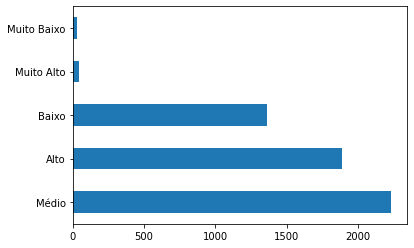

In [33]:
df_brazil['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

In [34]:
df_brazil[['CITY','IDHM','IDHM_dist']].head()

,CITY,IDHM,IDHM_dist
0,Abadia De Goiás,0.708,Alto
1,Abadia Dos Dourados,0.689,Médio
2,Abadiânia,0.689,Médio
3,Abaetetuba,0.628,Médio
4,Abaeté,0.698,Médio


#### IDHM_Renda

In [35]:
df_brazil['IDHM_Renda_dist'] = 'Muito Baixo'

In [36]:
df_brazil.loc[(df_brazil['IDHM_Renda'] <= 0.499),'IDHM_Renda_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.5) & (df_brazil['IDHM_Renda'] <= 0.599),'IDHM_Renda_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.6) & (df_brazil['IDHM_Renda'] <= 0.699),'IDHM_Renda_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.7) & (df_brazil['IDHM_Renda'] <= 0.799),'IDHM_Renda_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.8) & (df_brazil['IDHM_Renda'] <= 1),'IDHM_Renda_dist'] = 'Muito Alto'
df_brazil['IDHM_Renda_dist'] = df_brazil['IDHM_Renda_dist'].astype('category')

In [37]:
df_brazil['IDHM_Renda_dist'].cat.categories

Index(['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio'], dtype='object')

In [38]:
df_brazil['IDHM_Renda_dist'].value_counts()

Médio          2032
Baixo          1795
Alto           1548
Muito Baixo     132
Muito Alto       56
Name: IDHM_Renda_dist, dtype: int64

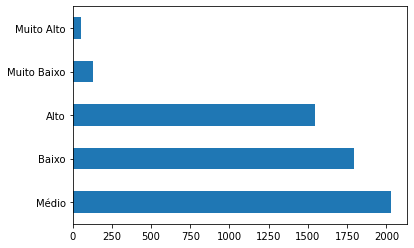

In [39]:
df_brazil['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

In [40]:
df_brazil[['CITY','IDHM_Renda','IDHM_Renda_dist']].head()

,CITY,IDHM_Renda,IDHM_Renda_dist
0,Abadia De Goiás,0.687,Médio
1,Abadia Dos Dourados,0.693,Médio
2,Abadiânia,0.671,Médio
3,Abaetetuba,0.579,Baixo
4,Abaeté,0.720,Alto


#### IDHM_Longevidade

In [41]:
df_brazil['IDHM_Longevidade_dist'] = 'Muito Baixo'

In [42]:
df_brazil.loc[(df_brazil['IDHM_Longevidade'] <= 0.499),'IDHM_Longevidade_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.5) & (df_brazil['IDHM_Longevidade'] <= 0.599),'IDHM_Longevidade_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.6) & (df_brazil['IDHM_Longevidade'] <= 0.699),'IDHM_Longevidade_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.7) & (df_brazil['IDHM_Longevidade'] <= 0.799),'IDHM_Longevidade_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.8) & (df_brazil['IDHM_Longevidade'] <= 1),'IDHM_Longevidade_dist'] = 'Muito Alto'
df_brazil['IDHM_Longevidade_dist'] = df_brazil['IDHM_Longevidade_dist'].astype('category')

In [43]:
df_brazil['IDHM_Longevidade_dist'].cat.categories

Index(['Alto', 'Muito Alto', 'Médio'], dtype='object')

In [44]:
df_brazil['IDHM_Longevidade_dist'].value_counts()

Muito Alto    3165
Alto          2319
Médio           79
Name: IDHM_Longevidade_dist, dtype: int64

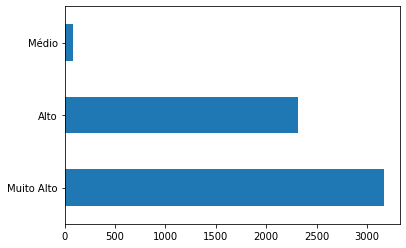

In [45]:
df_brazil['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

#### IDHM_Educacao

In [46]:
df_brazil['IDHM_Educacao_dist'] = 'Muito Baixo'

In [47]:
df_brazil.loc[(df_brazil['IDHM_Educacao'] <= 0.499),'IDHM_Educacao_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.5) & (df_brazil['IDHM_Educacao'] <= 0.599),'IDHM_Educacao_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.6) & (df_brazil['IDHM_Educacao'] <= 0.699),'IDHM_Educacao_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.7) & (df_brazil['IDHM_Educacao'] <= 0.799),'IDHM_Educacao_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.8) & (df_brazil['IDHM_Educacao'] <= 1),'IDHM_Educacao_dist'] = 'Muito Alto'
df_brazil['IDHM_Educacao_dist'] = df_brazil['IDHM_Educacao_dist'].astype('category')

In [48]:
df_brazil['IDHM_Educacao_dist'].cat.categories

Index(['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio'], dtype='object')

In [49]:
df_brazil['IDHM_Educacao_dist'].value_counts()

Baixo          2011
Médio          1613
Muito Baixo    1576
Alto            358
Muito Alto        5
Name: IDHM_Educacao_dist, dtype: int64

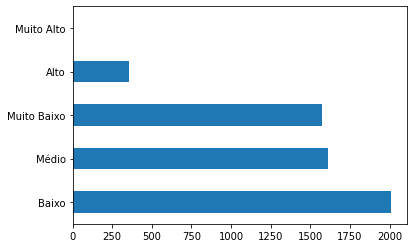

In [50]:
df_brazil['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

### Normalização
. Ainda vou fazer

# **Análise do dataSet** 

In [51]:
#df_brazil.loc[(df_brazil['IDHM'] ==  1) | (df_brazil['IDHM'] > 0.6)][['CITY','STATE','IDHM','IDHM_dist']]

In [52]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
sudeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

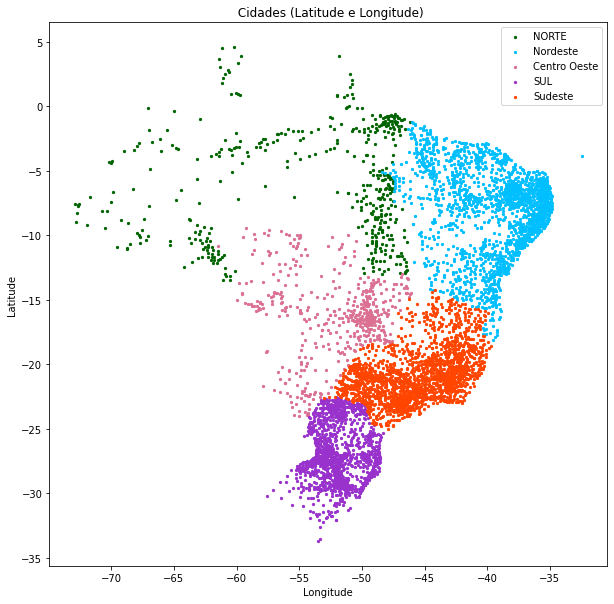

In [53]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## Montado o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#000000')
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')
#plt.scatter(df_brazil[long&lat&~cidadesNordeste]["LONG"], df_brazil[long&lat&~cidadesNordeste]["LAT"], s=1, alpha=1, c = '#4b0082')
plt.legend()
plt.show()

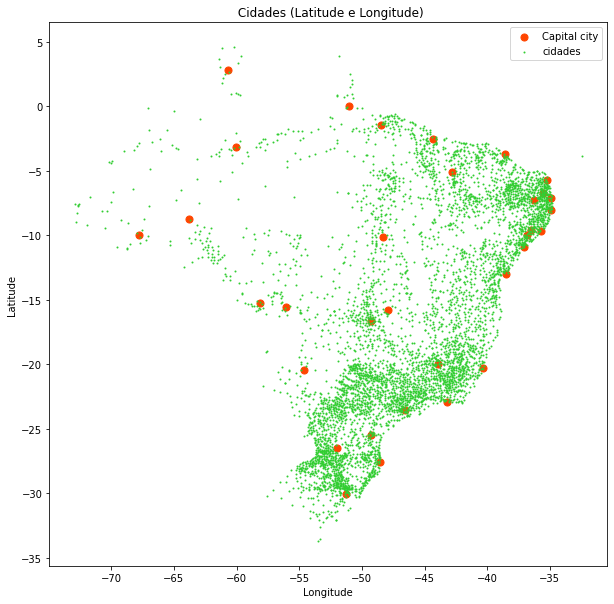

In [54]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
#Montando o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

### **Índice de Desenvolvimento Humano** 

<AxesSubplot:>

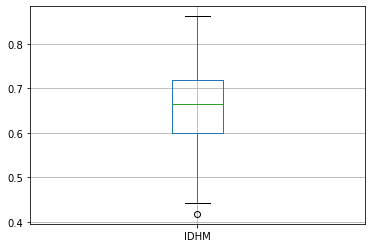

In [55]:
df_brazil.boxplot(column=['IDHM'])

# **Analisando as Regiões** 

## **Norte**

In [56]:
DadosNorte = [{'Capitais':norte.loc[(norte['CAPITAL'] == 1)]['CITY'].count(),'Cidades': norte['CITY'].count(),'Habitantes': norte['IBGE_RES_POP'].sum(), 'Empresas': norte['COMP_TOT'].sum()}]
df_DadosNorte = pd.DataFrame(DadosNorte)
df_DadosNorte

,Capitais,Cidades,Habitantes,Empresas
0,7,449,15864454,176417


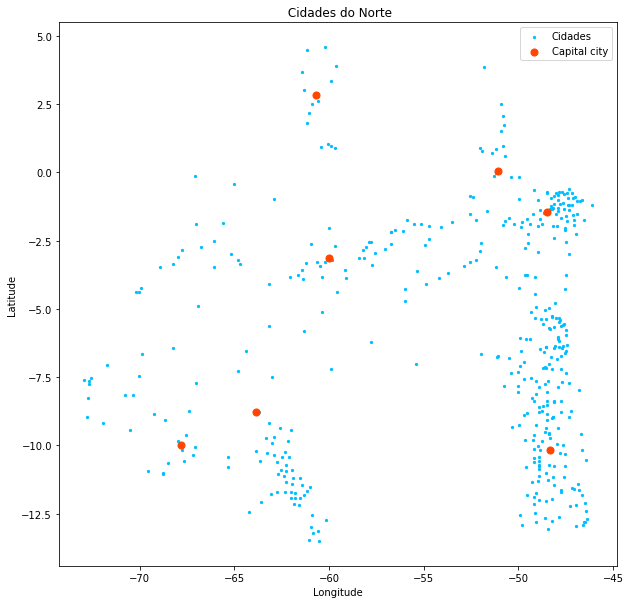

In [57]:
# Mapa do Norte

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNorte = norte['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Norte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNorte]["LONG"], df_brazil[long&lat&capNorte]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

<AxesSubplot:>

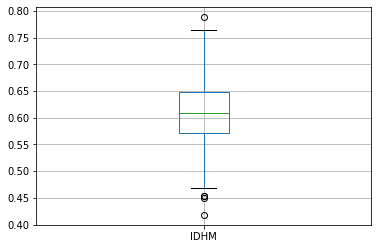

In [58]:
norte.boxplot(column=['IDHM'])

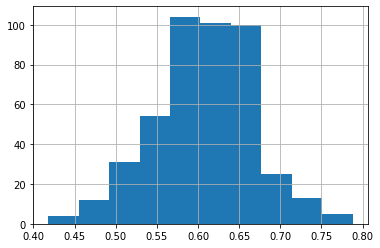

In [59]:
#Histograma do IDHM
histPE=norte['IDHM'].hist()

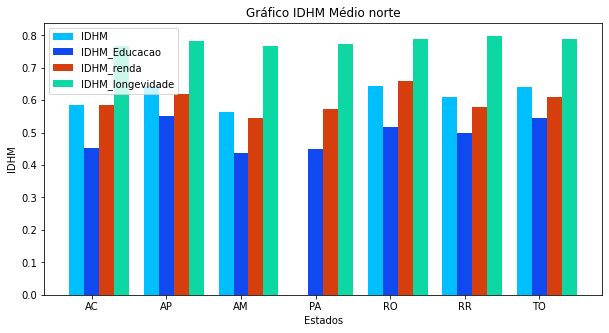

In [60]:
#Comparando os IDHM dos estados do norte
# Criando lista
dados1 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Educacao.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Educacao.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Educacao.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Educacao.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Educacao.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Educacao.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Educacao.mean()}
dados2 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM.mean(),'PA':norte[norte['STATE'] == 'PI'].IDHM.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM.mean()}
dados3 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Renda.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Renda.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Renda.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Renda.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Renda.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Renda.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Renda.mean()}
dados4 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Longevidade.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Longevidade.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Longevidade.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Longevidade.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Longevidade.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Longevidade.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio norte")
plt.legend()
plt.show()

In [61]:
#Capitais
norte.loc[norte['CAPITAL'] == 1][['CITY','STATE','IDHM','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False)

,CITY,STATE,IDHM,REGIAO_TUR,CATEGORIA_TUR
3495,Palmas,TO,0.788,Serras E Lago,A
608,Boa Vista,RR,0.752,"Roraima, A Savana Amazônica",A
558,Belém,PA,0.746,Belém,A
2849,Manaus,AM,0.737,Polo Amazônico,A
3927,Porto Velho,RO,0.736,Polo Porto Velho,A
2797,Macapá,AP,0.733,Meio Do Mundo,A
4161,Rio Branco,AC,0.727,Conheça Rio Branco,A


In [62]:
#Melhores cidades turisticas do Norte
norte.loc[(norte['IDHM'] >= 0.650) & (norte['REGIAO_TUR'] != '0')][['CITY','STATE','IDHM','REGIAO_TUR','CATEGORIA_TUR', 'RURAL_URBAN']].sort_values('IDHM', ascending=False).head(10)

,CITY,STATE,IDHM,REGIAO_TUR,CATEGORIA_TUR,RURAL_URBAN
3495,Palmas,TO,0.788,Serras E Lago,A,Urbano
3572,Paraíso Do Tocantins,TO,0.764,Serras E Lago,C,Urbano
2014,Gurupi,TO,0.759,Ilha Do Bananal,C,Urbano
275,Araguaína,TO,0.752,Vale Dos Grandes Rios,B,Urbano
608,Boa Vista,RR,0.752,"Roraima, A Savana Amazônica",A,Urbano
558,Belém,PA,0.746,Belém,A,Urbano
1987,Guaraí,TO,0.741,Vale Dos Grandes Rios,C,Urbano
3920,Porto Nacional,TO,0.740,Serras E Lago,C,Urbano
2849,Manaus,AM,0.737,Polo Amazônico,A,Urbano
3927,Porto Velho,RO,0.736,Polo Porto Velho,A,Urbano


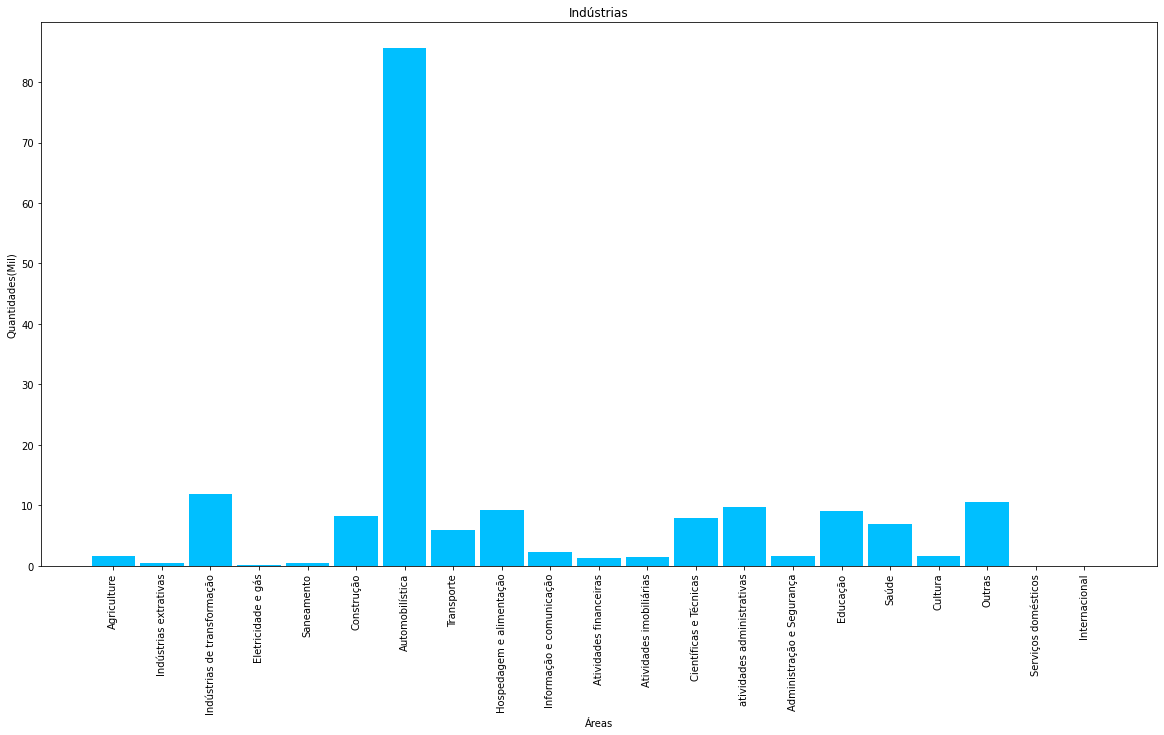

In [63]:
# Criando Principais tipos de Industria no norte
dados =  {'Agriculture':norte.COMP_A.sum()/1000,'Indústrias extrativas':norte.COMP_B.sum()/1000,'Indústrias de transformação':norte.COMP_C.sum()/1000,'Eletricidade e gás':norte.COMP_D.sum()/1000,'Saneamento':norte.COMP_E.sum()/1000,'Construção':norte.COMP_F.sum()/1000,'Automobilística':norte.COMP_G.sum()/1000,'Transporte':norte.COMP_H.sum()/1000,'Hospedagem e alimentação':norte.COMP_I.sum()/1000,'Informação e comunicação':norte.COMP_J.sum()/1000,'Atividades financeiras':norte.COMP_K.sum()/1000,'Atividades imobiliárias':norte.COMP_L.sum()/1000,'Científicas e Técnicas':norte.COMP_M.sum()/1000,'atividades administrativas':norte.COMP_N.sum()/1000,'Administração e Segurança':norte.COMP_O.sum()/1000,'Educação':norte.COMP_P.sum()/1000,'Saúde':norte.COMP_Q.sum()/1000,'Cultura':norte.COMP_R.sum()/1000,'Outras':norte.COMP_S.sum()/1000,'Serviços domésticos':norte.COMP_T.sum()/1000,'Internacional':norte.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

## **Nordeste**

In [66]:
DadosNordeste = [{'Capitais':nordeste.loc[(nordeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': nordeste['CITY'].count(),'Habitantes': nordeste['IBGE_RES_POP'].sum(), 'Empresas': nordeste['COMP_TOT'].sum()}]
df_DadosNordeste = pd.DataFrame(DadosNordeste)
df_DadosNordeste

,Capitais,Cidades,Habitantes,Empresas
0,13,1792,53062072,771290


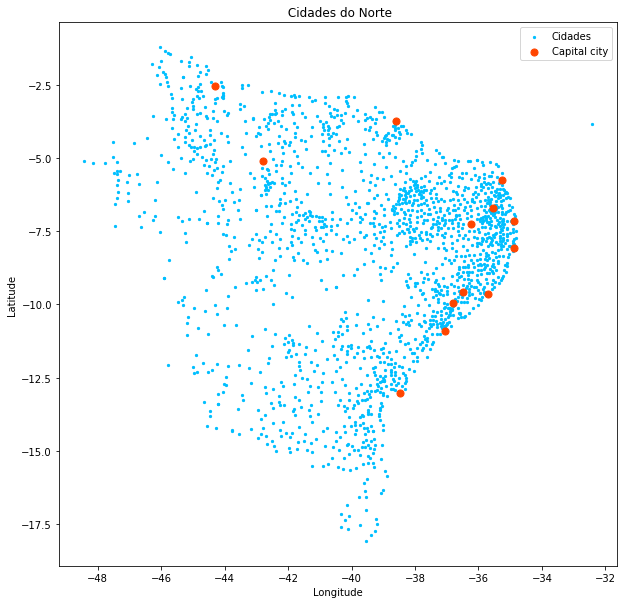

In [64]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNordestete = nordeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Norte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNordestete]["LONG"], df_brazil[long&lat&capNordestete]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

<AxesSubplot:>

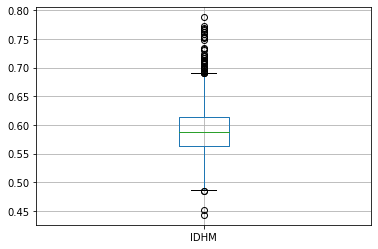

In [67]:
nordeste.boxplot(column=['IDHM'])

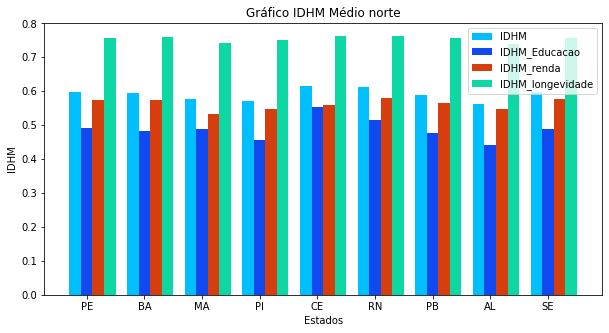

In [71]:
# Criando lista
dados1 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Educacao.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Educacao.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Educacao.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Educacao.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Educacao.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Educacao.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Educacao.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Educacao.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Educacao.mean()}
dados2 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
dados3 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Renda.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Renda.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Renda.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Renda.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Renda.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Renda.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Renda.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Renda.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Renda.mean()}
dados4 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Longevidade.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Longevidade.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Longevidade.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Longevidade.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Longevidade.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Longevidade.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Longevidade.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Longevidade.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio norte")
plt.legend()
plt.show()
plt.show()


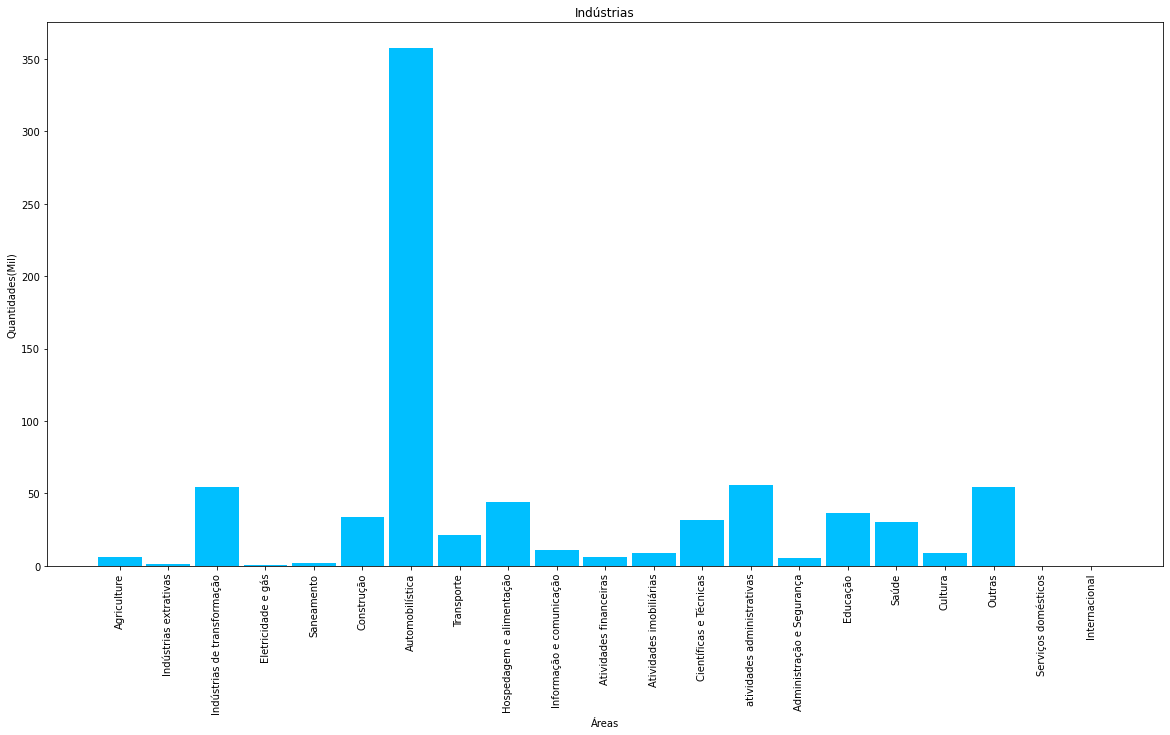

In [85]:
# Criando Principais tipos de Industria no nordeste
dados =  {'Agriculture':nordeste.COMP_A.sum()/1000,'Indústrias extrativas':nordeste.COMP_B.sum()/1000,'Indústrias de transformação':nordeste.COMP_C.sum()/1000,'Eletricidade e gás':nordeste.COMP_D.sum()/1000,'Saneamento':nordeste.COMP_E.sum()/1000,'Construção':nordeste.COMP_F.sum()/1000,'Automobilística':nordeste.COMP_G.sum()/1000,'Transporte':nordeste.COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste.COMP_I.sum()/1000,'Informação e comunicação':nordeste.COMP_J.sum()/1000,'Atividades financeiras':nordeste.COMP_K.sum()/1000,'Atividades imobiliárias':nordeste.COMP_L.sum()/1000,'Científicas e Técnicas':nordeste.COMP_M.sum()/1000,'atividades administrativas':nordeste.COMP_N.sum()/1000,'Administração e Segurança':nordeste.COMP_O.sum()/1000,'Educação':nordeste.COMP_P.sum()/1000,'Saúde':nordeste.COMP_Q.sum()/1000,'Cultura':nordeste.COMP_R.sum()/1000,'Outras':nordeste.COMP_S.sum()/1000,'Serviços domésticos':nordeste.COMP_T.sum()/1000,'Internacional':nordeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

# **Sul**

In [83]:
DadosSul = [{'Capitais':sul.loc[(sul['CAPITAL'] == 1)]['CITY'].count(),'Cidades': sul['CITY'].count(),'Habitantes': sul['IBGE_RES_POP'].sum(), 'Empresas': sul['COMP_TOT'].sum()}]
df_DadosSul = pd.DataFrame(DadosSul)
df_DadosSul

,Capitais,Cidades,Habitantes,Empresas
0,4,1188,27386891,1126447


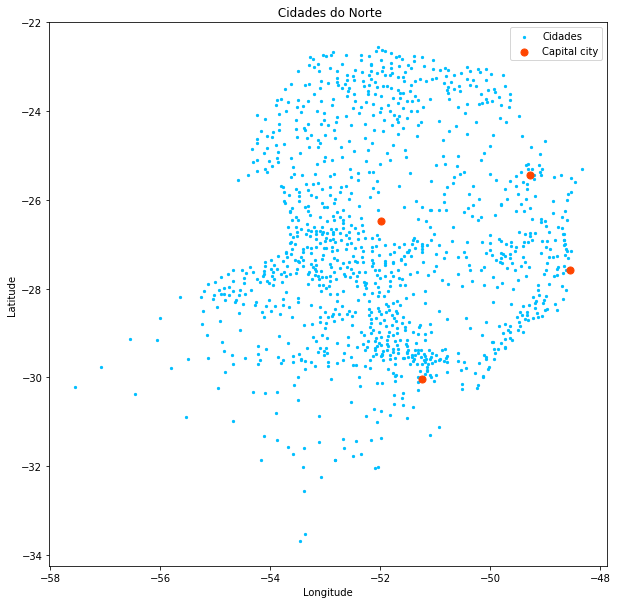

In [76]:
# Mapa do Sul

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capSul = sul['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Norte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capSul]["LONG"], df_brazil[long&lat&capSul]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

<AxesSubplot:>

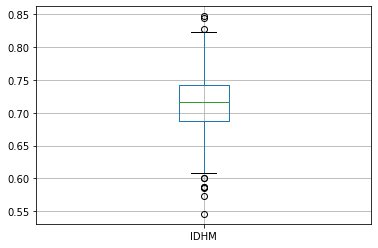

In [77]:
sul.boxplot(column=['IDHM'])

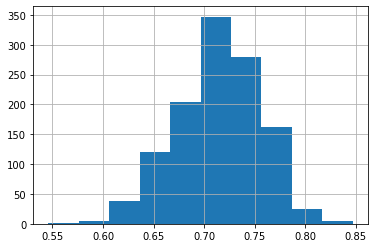

In [79]:
#Histograma do IDHM
histSUL=sul['IDHM'].hist()

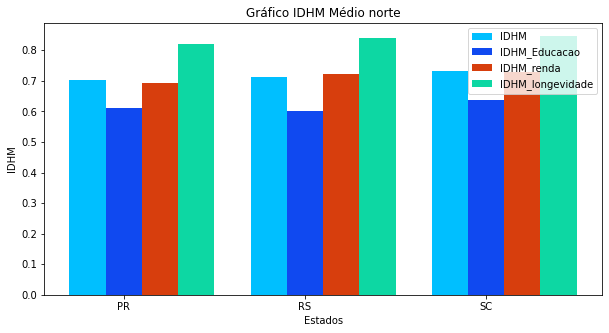

In [82]:
# Criando lista
dados1 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Educacao.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Educacao.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Educacao.mean()}
dados2 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM.mean()}
dados3 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Renda.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Renda.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Renda.mean()}
dados4 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Longevidade.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Longevidade.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio norte")
plt.legend()
plt.show()


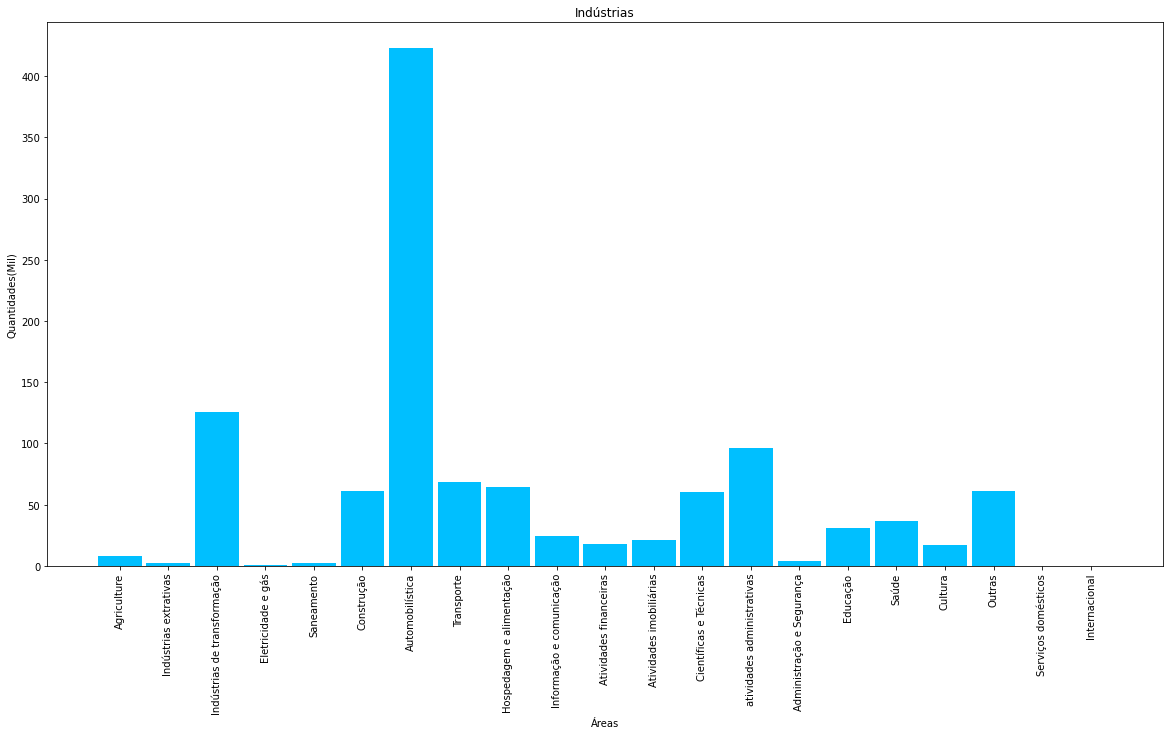

In [86]:
# Criando Principais tipos de Industria no sul
dados =  {'Agriculture':sul.COMP_A.sum()/1000,'Indústrias extrativas':sul.COMP_B.sum()/1000,'Indústrias de transformação':sul.COMP_C.sum()/1000,'Eletricidade e gás':sul.COMP_D.sum()/1000,'Saneamento':sul.COMP_E.sum()/1000,'Construção':sul.COMP_F.sum()/1000,'Automobilística':sul.COMP_G.sum()/1000,'Transporte':sul.COMP_H.sum()/1000,'Hospedagem e alimentação':sul.COMP_I.sum()/1000,'Informação e comunicação':sul.COMP_J.sum()/1000,'Atividades financeiras':sul.COMP_K.sum()/1000,'Atividades imobiliárias':sul.COMP_L.sum()/1000,'Científicas e Técnicas':sul.COMP_M.sum()/1000,'atividades administrativas':sul.COMP_N.sum()/1000,'Administração e Segurança':sul.COMP_O.sum()/1000,'Educação':sul.COMP_P.sum()/1000,'Saúde':sul.COMP_Q.sum()/1000,'Cultura':sul.COMP_R.sum()/1000,'Outras':sul.COMP_S.sum()/1000,'Serviços domésticos':sul.COMP_T.sum()/1000,'Internacional':sul.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [ ]:
nordeste.loc[(nordeste['IDHM'] <= 0.5) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM']]

In [ ]:
#As 10 cidades com IDHM maior 
nordeste.loc[(nordeste['IDHM'] >= 0.650) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM','IBGE_RES_POP','GDP','COMP_TOT']].sort_values('IDHM', ascending=False).head(10)

In [ ]:
# Criando lista
dados =  {'Agriculture':nordeste[nordeste['STATE'] == 'PE'].COMP_A.sum()/1000,'Indústrias extrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_B.sum()/1000,'Indústrias de transformação':nordeste[nordeste['STATE'] == 'PE'].COMP_C.sum()/1000,'Eletricidade e gás':nordeste[nordeste['STATE'] == 'PE'].COMP_D.sum()/1000,'Saneamento':nordeste[nordeste['STATE'] == 'PE'].COMP_E.sum()/1000,'Construção':nordeste[nordeste['STATE'] == 'PE'].COMP_F.sum()/1000,'Automobilística':nordeste[nordeste['STATE'] == 'PE'].COMP_G.sum()/1000,'Transporte':nordeste[nordeste['STATE'] == 'PE'].COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste[nordeste['STATE'] == 'PE'].COMP_I.sum()/1000,'Informação e comunicação':nordeste[nordeste['STATE'] == 'PE'].COMP_J.sum()/1000,'Atividades financeiras':nordeste[nordeste['STATE'] == 'PE'].COMP_K.sum()/1000,'Atividades imobiliárias':nordeste[nordeste['STATE'] == 'PE'].COMP_L.sum()/1000,'Científicas e Técnicas':nordeste[nordeste['STATE'] == 'PE'].COMP_M.sum()/1000,'atividades administrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_N.sum()/1000,'Administração e Segurança':nordeste[nordeste['STATE'] == 'PE'].COMP_O.sum()/1000,'Educação':nordeste[nordeste['STATE'] == 'PE'].COMP_P.sum()/1000,'Saúde':nordeste[nordeste['STATE'] == 'PE'].COMP_Q.sum()/1000,'Cultura':nordeste[nordeste['STATE'] == 'PE'].COMP_R.sum()/1000,'Outras':nordeste[nordeste['STATE'] == 'PE'].COMP_S.sum()/1000,'Serviços domésticos':nordeste[nordeste['STATE'] == 'PE'].COMP_T.sum()/1000,'Internacional':nordeste[nordeste['STATE'] == 'PE'].COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 50)
plt.xlabel("Áreas")
plt.ylabel("Quantidades")
plt.title("Indústrias")
plt.show()

# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [ ]:
df_brazil.describe()

In [ ]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [ ]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [ ]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

In [ ]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [ ]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [ ]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

<h1> <font color ="yellow">Limpeza</font> <font color="green">dos dados</font><h1>

<h3>Univariado usando Z-Score robusto<h3>

In [ ]:
df_brazil['TAXES'].value_counts()

In [ ]:
df_brazil['TAXES'].describe()

In [ ]:
# Plotando o gráfico para ver as outliers
df_brazil['TAXES'].plot.box()

In [ ]:
df_brazil['TAXES'].hist()

In [ ]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['TAXES_Log'] = log10(df_brazil['TAXES'])
 df_brazil['TAXES_Log'].hist()

In [ ]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['TAXES_Log'] - df_brazil['TAXES_Log'].median()).median()*(1/0.6745)
print(mad)

In [ ]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad).hist()

In [ ]:
# Usando a limiar > 2.5, encontro os outliers
df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad > 2.5]

In [ ]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad < 2.5]

In [ ]:
df_brazil['TAXES'].plot.box()